In [1]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=347b7a57a9c0c940f203685731ad3c0e7957bbde2d7084d815c8be954b2f980d
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [2]:
#Importing necessary libraries
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter
from bokeh.models import ColumnDataSource, LabelSet, Arrow, NormalHead, OpenHead, VeeHead, ColorBar, Span
from bokeh.models import Label, Title, NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
from bokeh.palettes import RdBu, Spectral10, Spectral6
from bokeh.io import show, output_notebook
from matplotlib.ticker import MaxNLocator

#A

In [3]:
#Reading the data into a dataframe
etf_df = pd.read_csv('https://raw.githubusercontent.com/shreyaschoudhary/Process-Data-Analytics/master/SamplePriceandDiv.csv')

In [4]:
#Displaying the dataframe
etf_df

,Date,ZWU.CA.PX_CLOSE,ZWU.CA.DIV,CLF.CA.PX_CLOSE,CLF.CA.DIV,CVD.CA.PX_CLOSE,CVD.CA.DIV,XTR.CA.PX_CLOSE,XTR.CA.DIV,COW.CA.PX_CLOSE,COW.CA.DIV,XIU.CA.PX_CLOSE,XIU.CA.DIV,XRE.CA.PX_CLOSE,XRE.CA.DIV,CHB.CA.PX_CLOSE,CHB.CA.DIV,CPD.CA.PX_CLOSE,CPD.CA.DIV,HYXU.US.PX_CLOSE,HYXU.US.DIV,IYLD.US.PX_CLOSE,IYLD.US.DIV,SPY.US.PX_CLOSE,SPY.US.DIV,XEM.CA.PX_CLOSE,XEM.CA.DIV,XSP.CA.PX_CLOSE,XSP.CA.DIV,CSD.CA.PX_CLOSE,CSD.CA.DIV,XSH.CA.PX_CLOSE,XSH.CA.DIV,XQQ.CA.PX_CLOSE,XQQ.CA.DIV,REM.US.PX_CLOSE,REM.US.DIV,REZ.US.PX_CLOSE,REZ.US.DIV,ITA.US.PX_CLOSE,ITA.US.DIV,SIA.CA.PX_CLOSE,SIA.CA.DIV,ZWB.CA.PX_CLOSE,ZWB.CA.DIV,HE.US.PX_CLOSE,HE.US.DIV,CBO.CA.PX_CLOSE,CBO.CA.DIV,FIE.CA.PX_CLOSE,FIE.CA.DIV,XST.CA.PX_CLOSE,XST.CA.DIV,EEM.US.PX_CLOSE,EEM.US.DIV,IVW.US.PX_CLOSE,IVW.US.DIV,PFF.US.PX_CLOSE,PFF.US.DIV,SHV.US.PX_CLOSE,SHV.US.DIV,IHF.US.PX_CLOSE,IHF.US.DIV,IYR.US.PX_CLOSE,IYR.US.DIV,VCSH.US.PX_CLOSE,VCSH.US.DIV,EMB.US.PX_CLOSE,EMB.US.DIV,CADUSD
0,2014-01-31,14.63,0.000,19.480000,0.056,19.290001,0.07931,12.00,0.06,26.500000,0.0,19.780000,0.0,15.390000,0.070,21.17,0.104,16.04,0.062,56.900000,0.0,25.110000,0.0,178.180000,0.980000,23.959999,0.0,20.440001,0.0,20.350000,0.083,19.910000,0.05001,29.360001,0.0,48.759998,0.0,48.130001,0.0,105.239998,0.0,12.110000,0.0,15.380000,0.000,26.020000,0.0,19.809999,0.07351,6.91,0.04,30.799999,0.0,38.189999,0.0,95.849998,0.0,37.919998,0.0,110.239998,0.0,92.900002,0.0,65.250000,0.0,80.150002,0.0,107.279999,0.0,1.11
1,2014-02-03,14.50,0.000,19.500000,0.000,19.180000,0.00000,11.97,0.00,25.850000,0.0,19.510000,0.0,15.290000,0.000,21.09,0.000,16.03,0.000,56.600000,0.0,25.000000,0.0,174.170000,0.000000,23.170000,0.0,19.959999,0.0,20.299999,0.000,19.950001,0.00000,28.549999,0.0,48.400002,0.0,47.610001,0.0,102.110001,0.0,11.850000,0.0,15.250000,0.000,25.200001,0.0,19.840000,0.00000,6.84,0.00,30.680000,0.0,37.110001,0.0,93.599998,0.0,37.650002,0.0,110.269997,0.0,90.889999,0.0,64.300003,0.0,80.120003,0.0,106.690002,0.0,1.11
2,2014-02-04,14.47,0.000,19.480000,0.000,19.270000,0.00000,11.96,0.00,26.000000,0.0,19.520000,0.0,15.300000,0.000,21.06,0.000,16.03,0.000,56.540000,0.0,24.990000,0.0,175.390000,0.000000,23.680000,0.0,20.120001,0.0,20.350000,0.000,19.900000,0.00000,28.750000,0.0,48.639999,0.0,48.080002,0.0,102.339996,0.0,11.920000,0.0,15.240000,0.000,25.110001,0.0,19.809999,0.00000,6.84,0.00,30.440001,0.0,37.860001,0.0,94.470001,0.0,37.730000,0.0,110.250000,0.0,90.669998,0.0,64.970001,0.0,80.070000,0.0,107.400002,0.0,1.11
3,2014-02-05,14.48,0.000,19.460000,0.000,19.219999,0.00000,11.99,0.00,26.010000,0.0,19.550000,0.0,15.520000,0.000,21.09,0.000,16.02,0.000,56.340000,0.0,25.000000,0.0,175.170000,0.000000,23.580000,0.0,20.080000,0.0,20.340000,0.000,19.910000,0.00000,28.730000,0.0,49.000000,0.0,48.020000,0.0,102.320000,0.0,11.960000,0.0,15.390000,0.000,25.190001,0.0,19.809999,0.00000,6.89,0.00,30.400000,0.0,37.720001,0.0,94.290001,0.0,37.740002,0.0,110.239998,0.0,90.919998,0.0,64.949997,0.0,80.059998,0.0,107.720001,0.0,1.11
4,2014-02-06,14.60,0.073,19.460000,0.000,19.139999,0.00000,12.04,0.00,26.440000,0.0,19.830000,0.0,15.520000,0.000,21.15,0.000,15.99,0.000,57.170000,0.0,25.040000,0.0,177.480000,0.000000,24.020000,0.0,20.340000,0.0,20.309999,0.000,19.910000,0.00000,29.070000,0.0,48.759998,0.0,48.400002,0.0,102.830002,0.0,12.050000,0.0,15.600000,0.068,25.469999,0.0,19.799999,0.00000,6.94,0.00,30.540001,0.0,38.509998,0.0,95.589996,0.0,37.750000,0.0,110.260002,0.0,91.529999,0.0,65.430000,0.0,80.110001,0.0,107.930000,0.0,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020-01-27,14.49,0.000,17.910000,0.000,18.590000,0.00000,11.29,0.00,40.889999,0.0,26.260000,0.0,20.410000,0.000,18.33,0.000,12.30,0.000,50.849998,0.0,25.600000,0.0,323.500000,0.000000,31.639999,0.0,35.750000,0.0,17.510000,0.00

In [5]:
#Filtering out the columns ending with '.PX_CLOSE'
etf_df_px_close = etf_df.loc[:, etf_df.columns.str.contains('.PX_CLOSE')]

In [6]:
#Displaying the filtered dataframe
etf_df_px_close

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,14.63,19.480000,19.290001,12.00,26.500000,19.780000,15.390000,21.17,16.04,56.900000,25.110000,178.180000,23.959999,20.440001,20.350000,19.910000,29.360001,48.759998,48.130001,105.239998,12.110000,15.380000,26.020000,19.809999,6.91,30.799999,38.189999,95.849998,37.919998,110.239998,92.900002,65.250000,80.150002,107.279999
1,14.50,19.500000,19.180000,11.97,25.850000,19.510000,15.290000,21.09,16.03,56.600000,25.000000,174.170000,23.170000,19.959999,20.299999,19.950001,28.549999,48.400002,47.610001,102.110001,11.850000,15.250000,25.200001,19.840000,6.84,30.680000,37.110001,93.599998,37.650002,110.269997,90.889999,64.300003,80.120003,106.690002
2,14.47,19.480000,19.270000,11.96,26.000000,19.520000,15.300000,21.06,16.03,56.540000,24.990000,175.390000,23.680000,20.120001,20.350000,19.900000,28.750000,48.639999,48.080002,102.339996,11.920000,15.240000,25.110001,19.809999,6.84,30.440001,37.860001,94.470001,37.730000,110.250000,90.669998,64.970001,80.070000,107.400002
3,14.48,19.460000,19.219999,11.99,26.010000,19.550000,15.520000,21.09,16.02,56.340000,25.000000,175.170000,23.580000,20.080000,20.340000,19.910000,28.730000,49.000000,48.020000,102.320000,11.960000,15.390000,25.190001,19.809999,6.89,30.400000,37.720001,94.290001,37.740002,110.239998,90.919998,64.949997,80.059998,107.720001
4,14.60,19.460000,19.139999,12.04,26.440000,19.830000,15.520000,21.15,15.99,57.170000,25.040000,177.480000,24.020000,20.340000,20.309999,19.910000,29.070000,48.759998,48.400002,102.830002,12.050000,15.600000,25.469999,19.799999,6.94,30.540001,38.509998,95.589996,37.750000,110.260002,91.529999,65.430000,80.110001,107.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,14.49,17.910000,18.590000,11.29,40.889999,26.260000,20.410000,18.33,12.30,50.849998,25.600000,323.500000,31.639999,35.750000,17.510000,19.410000,71.419998,45.599998,78.480003,230.050003,19.160000,18.799999,48.259998,18.700001,7.33,66.040001,43.060001,197.889999,37.950001,110.589996,198.350006,95.500000,81.519997,114.639999
1549,14.55,17.879999,18.570000,11.32,41.240002,26.389999,20.340000,18.48,12.32,50.930000,25.760000,326.890015,31.840000,36.099998,17.559999,19.389999,72.610001,45.990002,78.589996,232.000000,19.270000,18.879999,48.689999,18.700001,7.37,65.400002,43.419998,200.610001,38.060001,110.589996,201.399994,95.910004,81.510002,115.180000
1550,14.46,17.900000,18.610001,11.32,41.330002,26.350000,20.389999,18.48,12.32,50.889999,25.820000,326.619995,32.049999,36.099998,17.590000,19.400000,72.599998,46.330002,78.160004,232.110001,19.299999,18.770000,48.840000,18.719999,7.35,65.349998,43.630001,201.039993,38.139999,110.599998,199.240005,95.610001,81.580002,115.709999
1551,14.48,17.910000,18.549999,11.32,41.330002,26.350000,20.400000,18.48,12.30,50.919998,25.790001,327.679993,31.480000,36.189999,17.620001,19.400000,72.930000,46.310001,78.570000,232.250000,18.980000,18.780001,49.340000,18.719999,7.34,65.339996,42.980000,201.580002,38.230000,110.610001,196.960007,95.730003,81.589996,115.629997


#B

In [7]:
#Implementing pct_change function for period of 22
etf_df_win_22 = etf_df_px_close.pct_change(periods=22)
etf_df_win_22

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.026931,0.005051,0.019189,0.003556,-0.072158,0.023782,0.031850,-0.013455,-0.001623,-0.008385,-0.003503,0.008637,-0.051843,-0.002789,-0.011851,0.006221,0.028958,0.029345,0.055264,0.027009,0.052747,0.005885,0.017714,0.005376,0.005487,0.040164,-0.034746,0.026347,0.013622,0.001630,-0.009340,0.038043,0.006171,0.006144
1549,0.033381,0.003930,0.008691,0.006222,-0.064640,0.028048,0.034588,-0.005382,0.000812,-0.007212,0.002725,0.017651,-0.044131,0.005291,-0.009029,0.005705,0.043997,0.038618,0.063752,0.024599,0.053581,0.013419,0.042612,0.005917,0.013755,0.027979,-0.027983,0.039699,0.014933,0.001812,0.000745,0.048426,0.009162,0.009731
1550,0.026260,0.004489,0.010864,0.007117,-0.062599,0.023699,0.033452,-0.006452,0.002441,-0.007024,0.013742,0.016779,-0.036959,0.006412,-0.005090,0.005181,0.044003,0.040890,0.056074,0.031142,0.055221,0.009140,0.048069,0.006993,0.012397,0.028486,-0.021090,0.041604,0.016524,0.001630,-0.010233,0.042298,0.009029,0.012602
1551,0.032074,0.005051,0.004875,0.006222,-0.063873,0.024893,0.027708,-0.008584,0.000000,-0.013178,0.007422,0.014929,-0.059737,0.003883,-0.005643,0.005181,0.040371,0.032553,0.053641,0.035397,0.036592,0.015135,0.057210,0.005911,0.009629,0.027358,-0.046372,0.036454,0.019195,0.001630,-0.023016,0.035255,0.007533,0.007757


In [8]:
#Implementing pct_change function for period of 65
etf_df_win_65 = etf_df_px_close.pct_change(periods=65)
etf_df_win_65

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.046965,0.003924,0.005408,0.018034,-0.003655,0.059726,0.018971,-0.003263,0.021595,-0.007030,0.022364,0.078369,0.024611,0.071001,-0.001710,0.009886,0.126321,0.057269,-0.038353,0.071595,-0.012880,0.009667,0.062060,0.009174,0.030942,0.033328,0.016525,0.093013,0.011191,-0.000362,0.159331,0.001468,0.005799,0.015682
1549,0.049784,0.001120,0.007050,0.019820,0.003895,0.066694,0.015477,0.004894,0.022407,-0.005079,0.026295,0.093241,0.027097,0.084736,-0.001138,0.007273,0.154372,0.066806,-0.032500,0.072188,-0.012807,0.012332,0.072231,0.007001,0.035112,0.025882,0.024298,0.117293,0.012234,-0.000362,0.158203,0.009048,0.005056,0.016773
1550,0.052402,0.002240,0.009219,0.021661,0.011503,0.068966,0.023081,0.003802,0.021559,-0.006055,0.027049,0.089169,0.036211,0.082459,-0.000568,0.006746,0.152015,0.070719,-0.038859,0.070026,-0.002068,0.006434,0.071523,0.007535,0.033755,0.032549,0.029009,0.116517,0.012208,-0.000271,0.148490,0.004518,0.005919,0.019651
1551,0.056934,0.002799,0.002703,0.023508,0.011503,0.066802,0.022044,0.001083,0.020747,-0.000785,0.027081,0.090921,0.016139,0.082885,-0.001134,0.007792,0.147420,0.079739,-0.033104,0.054675,-0.017598,0.008052,0.081543,0.007535,0.035261,0.041109,0.013679,0.114379,0.014866,-0.000271,0.147719,0.007048,0.005670,0.018946


In [9]:
#Implementing pct_change function for period of 130
etf_df_win_130 = etf_df_px_close.pct_change(periods=130)
etf_df_win_130

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.066225,-0.001672,-0.000538,0.013465,0.010628,0.058871,0.081038,-0.009189,-0.000812,-0.001179,0.023181,0.086518,0.014102,0.080713,-0.003982,0.002583,0.131137,0.061700,0.044172,0.069851,-0.031834,0.033535,0.081578,0.000000,0.057720,0.062762,0.005605,0.082549,0.021534,0.000362,0.102680,0.070508,0.012168,0.011827
1549,0.069853,-0.005008,-0.006952,0.017071,0.014015,0.062827,0.077901,0.003257,0.003257,-0.002741,0.027523,0.093900,0.017903,0.088005,0.000570,-0.000516,0.149074,0.071778,0.044663,0.084568,-0.023810,0.035088,0.080080,-0.001068,0.060432,0.059281,0.007892,0.094734,0.023118,0.000090,0.123758,0.074863,0.010663,0.014712
1550,0.068736,-0.003895,-0.000537,0.017071,0.013239,0.062500,0.081124,0.003257,0.008183,0.000787,0.031562,0.099101,0.025272,0.094603,0.001708,0.001032,0.158079,0.082477,0.061524,0.069829,-0.023773,0.029057,0.102234,-0.000534,0.059078,0.061049,0.017965,0.103827,0.025545,0.000271,0.122352,0.087466,0.012410,0.020911
1551,0.069424,-0.003893,-0.001615,0.017071,0.007803,0.059509,0.080509,0.002169,0.006547,0.000196,0.028720,0.099966,0.003187,0.094014,-0.001134,-0.000515,0.153408,0.076476,0.069999,0.071116,-0.037525,0.029605,0.114776,-0.001067,0.057637,0.059682,0.002566,0.103158,0.027688,0.000090,0.113272,0.090816,0.011906,0.016617


In [10]:
#Implementing pct_change function for period of 261
etf_df_win_261 = etf_df_px_close.pct_change(periods=261)
etf_df_win_261

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.159200,0.006180,0.036810,0.070142,0.145378,0.193094,0.197067,0.027466,-0.039062,0.052795,0.075630,0.259882,0.068919,0.244777,0.013310,0.026984,0.350861,0.102781,0.248290,0.291328,0.181987,0.086705,0.345039,0.025219,0.112291,0.154344,0.078387,0.279020,0.078738,0.001993,0.187298,0.245111,0.047007,0.086532
1549,0.164932,0.005624,0.037430,0.070956,0.154212,0.182878,0.183246,0.027237,-0.048649,0.039812,0.077373,0.267163,0.061333,0.250866,0.012104,0.025926,0.362800,0.105529,0.253629,0.295510,0.172141,0.074559,0.363102,0.025219,0.104948,0.136403,0.068405,0.290761,0.084022,0.002084,0.196246,0.252089,0.044598,0.089688
1550,0.145800,0.006183,0.035039,0.067925,0.146781,0.174242,0.178613,0.024958,-0.044961,0.041760,0.077629,0.261666,0.061258,0.245257,0.016176,0.025912,0.359042,0.113167,0.227194,0.279195,0.177547,0.060452,0.356667,0.024630,0.095380,0.133368,0.065966,0.289131,0.082907,0.001902,0.180751,0.231136,0.045897,0.096673
1551,0.149206,0.006180,0.035156,0.063910,0.139195,0.171111,0.167716,0.028953,-0.050193,0.044299,0.076377,0.265271,0.045153,0.249655,0.016148,0.024828,0.370349,0.103933,0.228808,0.277503,0.160856,0.056837,0.376674,0.024070,0.089021,0.122102,0.055242,0.293506,0.081165,0.001721,0.157839,0.228410,0.044285,0.095811


In [11]:
#Implementing pct_change function for period of 522
etf_df_win_522 = etf_df_px_close.pct_change(periods=522)
etf_df_win_522

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.065441,-0.000558,-0.010117,-0.013112,-0.013272,0.078439,0.231001,-0.047792,-0.151724,-0.069363,-0.010819,0.181002,-0.072956,0.146568,-0.032597,0.016763,0.308059,0.022880,0.291427,0.192587,0.045852,-0.047136,0.365591,0.012453,-0.045573,0.189696,-0.123550,0.253500,-0.002366,0.003084,0.244510,0.197642,0.028384,-0.016050
1549,0.074594,-0.001117,-0.009600,-0.010490,-0.010319,0.082889,0.215780,-0.039002,-0.156164,-0.064475,0.000388,0.190683,-0.068188,0.155570,-0.036224,0.014652,0.329367,0.040498,0.312458,0.195014,0.057049,-0.045501,0.384812,0.013001,-0.049032,0.170156,-0.114781,0.267518,-0.002097,0.003084,0.254672,0.216823,0.028388,-0.008351
1550,0.079104,-0.002230,-0.004813,-0.007888,-0.008159,0.086598,0.227574,-0.033978,-0.153265,-0.067607,0.003108,0.191522,-0.061219,0.156681,-0.030854,0.013584,0.333088,0.051521,0.322504,0.197246,0.044372,-0.049620,0.411561,0.011892,-0.051613,0.179177,-0.104842,0.273856,0.001839,0.003266,0.244472,0.227973,0.029141,-0.000863
1551,0.080597,-0.001115,-0.008021,-0.007018,-0.017122,0.083470,0.235615,-0.037500,-0.151139,-0.071481,-0.001549,0.186730,-0.082216,0.151814,-0.032931,0.013584,0.330354,0.043018,0.337134,0.186341,0.044579,-0.049595,0.430559,0.011892,-0.050453,0.186059,-0.123573,0.269715,0.001047,0.003265,0.213555,0.233793,0.029267,-0.002846


In [12]:
#Implementing pct_change function for period of 1044
etf_df_win_1044 = etf_df_px_close.pct_change(periods=1044)
etf_df_win_1044

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.213568,-0.065240,0.051471,0.095053,0.326306,0.430283,0.464132,0.054661,-0.005659,0.141414,0.114983,0.667096,0.340110,0.603858,-0.017396,-0.017215,1.006180,0.189979,0.246308,1.016744,0.197500,0.260899,0.686823,-0.026042,0.188006,0.370978,0.443513,0.801293,-0.020139,0.003357,0.653054,0.296850,0.032029,0.087253
1549,0.204470,-0.065831,0.047968,0.099029,0.342011,0.437364,0.457020,0.063903,0.007359,0.146556,0.125382,0.703262,0.353166,0.637931,-0.014037,-0.018228,1.062784,0.214097,0.259253,1.062956,0.199876,0.267965,0.691800,-0.026042,0.198374,0.354598,0.471366,0.843842,-0.020082,0.003266,0.698002,0.317988,0.031772,0.093308
1550,0.200997,-0.065274,0.047271,0.101167,0.347132,0.447802,0.463747,0.066975,0.017341,0.151879,0.130473,0.700172,0.359779,0.637188,-0.011242,-0.018219,1.056657,0.224366,0.242607,1.056254,0.272248,0.263122,0.689965,-0.024492,0.202946,0.370596,0.478983,0.842713,-0.012684,0.003448,0.690050,0.308650,0.031744,0.100219
1551,0.204659,-0.066215,0.039216,0.101167,0.336675,0.438319,0.470800,0.058419,0.037975,0.160967,0.129654,0.692038,0.329392,0.627980,-0.010668,-0.019211,1.042857,0.243555,0.256718,1.040861,0.242960,0.257870,0.734271,-0.027027,0.203279,0.362954,0.453992,0.829054,-0.009585,0.003447,0.658052,0.319504,0.031870,0.104604


In [13]:
#Implementing pct_change function for period of 1500
etf_df_win_1500 = etf_df_px_close.pct_change(periods=1500)
etf_df_win_1500

,ZWU.CA.PX_CLOSE,CLF.CA.PX_CLOSE,CVD.CA.PX_CLOSE,XTR.CA.PX_CLOSE,COW.CA.PX_CLOSE,XIU.CA.PX_CLOSE,XRE.CA.PX_CLOSE,CHB.CA.PX_CLOSE,CPD.CA.PX_CLOSE,HYXU.US.PX_CLOSE,IYLD.US.PX_CLOSE,SPY.US.PX_CLOSE,XEM.CA.PX_CLOSE,XSP.CA.PX_CLOSE,CSD.CA.PX_CLOSE,XSH.CA.PX_CLOSE,XQQ.CA.PX_CLOSE,REM.US.PX_CLOSE,REZ.US.PX_CLOSE,ITA.US.PX_CLOSE,SIA.CA.PX_CLOSE,ZWB.CA.PX_CLOSE,HE.US.PX_CLOSE,CBO.CA.PX_CLOSE,FIE.CA.PX_CLOSE,XST.CA.PX_CLOSE,EEM.US.PX_CLOSE,IVW.US.PX_CLOSE,PFF.US.PX_CLOSE,SHV.US.PX_CLOSE,IHF.US.PX_CLOSE,IYR.US.PX_CLOSE,VCSH.US.PX_CLOSE,EMB.US.PX_CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,-0.051081,-0.075851,-0.058734,-0.080619,0.440296,0.266763,0.274828,-0.144657,-0.247706,-0.141627,-0.013867,0.729114,0.229693,0.659703,-0.143346,-0.023151,1.383845,-0.072417,0.537015,1.132264,0.594010,0.138014,0.981930,-0.054122,0.018056,1.047752,0.018448,0.985452,-0.026923,0.002902,1.022947,0.393347,0.016839,0.024212
1549,-0.043393,-0.077875,-0.054962,-0.077425,0.459307,0.286689,0.270456,-0.133615,-0.246022,-0.139405,-0.005789,0.784724,0.229344,0.710090,-0.139216,-0.025138,1.492619,-0.060662,0.549487,1.204066,0.597844,0.149817,1.007007,-0.054601,0.027894,1.048231,0.038011,1.064739,-0.023351,0.002902,1.105373,0.411895,0.015574,0.024186
1550,-0.049310,-0.077320,-0.053889,-0.078926,0.463527,0.286621,0.260198,-0.134021,-0.246483,-0.142977,-0.001933,0.799460,0.243212,0.725621,-0.139433,-0.026593,1.528736,-0.052169,0.550179,1.229683,0.611018,0.145211,1.004103,-0.054068,0.029412,1.047306,0.043031,1.092423,-0.022051,0.002993,1.110817,0.416025,0.016827,0.030549
1551,-0.047368,-0.076804,-0.052121,-0.078176,0.462491,0.285366,0.255385,-0.137657,-0.248166,-0.134896,-0.003478,0.791188,0.217795,0.716793,-0.136698,-0.026593,1.532292,-0.051802,0.550622,1.215492,0.590947,0.143727,1.013878,-0.053111,0.025140,1.037418,0.029708,1.080289,-0.020246,0.003174,1.076104,0.412572,0.017332,0.031858


In [14]:
#Filtering out the last rows from each period and forming a new dataframe of it
etf_df_win_tot = pd.concat([etf_df_win_22[1552:],etf_df_win_65[1552:], etf_df_win_130[1552:], etf_df_win_261[1552:], etf_df_win_522[1552:], etf_df_win_1044[1552:], etf_df_win_1500[1552:]])
#Resetting the index of the formed dataframe
etf_df_win_tot = etf_df_win_tot.reset_index(drop=True)

In [15]:
#Transposing the dataframe for proper analysis 
etf_df_win_tot = etf_df_win_tot.T
#Renaming the columns of the dataframe
etf_df_win_tot.columns= ['period_22','period_65','period_130', 'period_261', 'period_522', 'period_1044', 'period_1500']

In [16]:
#Displaying the transposed dataframe
etf_df_win_tot

,period_22,period_65,period_130,period_261,period_522,period_1044,period_1500
ZWU.CA.PX_CLOSE,0.030714,0.055596,0.068098,0.152556,0.078475,0.217722,-0.052528
CLF.CA.PX_CLOSE,0.008436,0.006173,-0.002781,0.007303,0.000000,-0.066146,-0.076249
CVD.CA.PX_CLOSE,0.010320,0.010320,0.001076,0.040851,-0.013786,0.044944,-0.045175
XTR.CA.PX_CLOSE,0.008043,0.024523,0.010753,0.062147,-0.011394,0.106968,-0.082927
COW.CA.PX_CLOSE,-0.055339,0.000973,-0.002183,0.136778,-0.022571,0.344005,0.450635
XIU.CA.PX_CLOSE,0.017955,0.053737,0.044872,0.157568,0.071487,0.448889,0.269718
XRE.CA.PX_CLOSE,0.037852,0.022682,0.065651,0.156785,0.226723,0.469225,0.244022
CHB.CA.PX_CLOSE,-0.010215,0.001088,-0.004865,0.026198,-0.040146,0.075350,-0.140523
CPD.CA.PX_CLOSE,-0.004058,0.021649,0.000000,-0.051777,-0.152039,0.063258,-0.248622
HYXU.US.PX_CLOSE,-0.010445,0.005899,0.009272,0.049651,-0.076868,0.162727,-0.135080


#C

In [17]:
#Scaling te dataframe before implementing PCA
scaler = StandardScaler(with_std=False)
etf_scaled = scaler.fit_transform(etf_df_win_tot)

In [18]:
#Implementing PCA
pca = PCA(n_components=2, svd_solver='full')
pca_scores_etf = pca.fit_transform(etf_scaled)

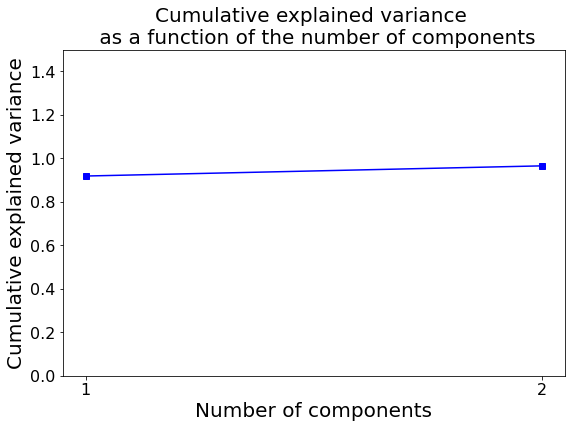

In [26]:
#Plotting cumulative explained variance as a function of the number of components
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'b-s')
sub0.set_xlabel('Number of components', fontsize=20)
sub0.set_ylabel('Cumulative explained variance', fontsize=20)
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=20)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.ylim(0,1.5)
plt.savefig('Fig_3_C_Choudhary_Shreyas.png')

So only 2 components are needed in order to get cumulative variance of above 95%. Hence doing pca for 2 components only.

#D

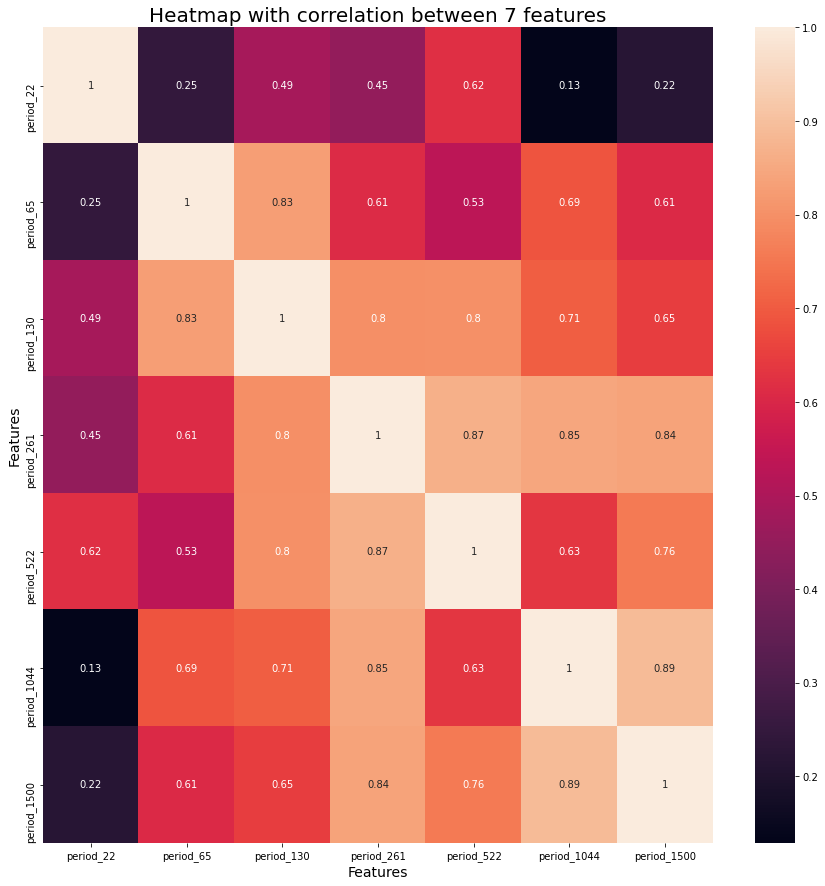

In [20]:
#Plotting the heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(etf_df_win_tot.corr(), annot = True, ax=ax)
plt.xlabel('Features',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title('Heatmap with correlation between 7 features',fontsize=20)
plt.savefig('Fig_3_D_Choudhary_Shreyas.png')

#E

In [21]:
#Merging the previously formed dataframe and PCA scores for PC1-PC2
scores_etf = pd.DataFrame(data = pca_scores_etf
                         ,columns = ['PC1', 'PC2']
                         )
scores_etf['etf_names'] = etf_df_win_tot.index
scores_etf

,PC1,PC2,etf_names
0,-0.315040,-0.069348,ZWU.CA.PX_CLOSE
1,-0.526970,0.124170,CLF.CA.PX_CLOSE
2,-0.440446,0.042182,CVD.CA.PX_CLOSE
3,-0.433761,-0.025021,XTR.CA.PX_CLOSE
4,0.131456,0.008510,COW.CA.PX_CLOSE
5,0.065659,-0.118937,XIU.CA.PX_CLOSE
6,0.084424,-0.085466,XRE.CA.PX_CLOSE
7,-0.510389,-0.034950,CHB.CA.PX_CLOSE
8,-0.637283,-0.114994,CPD.CA.PX_CLOSE
9,-0.462539,-0.117884,HYXU.US.PX_CLOSE


In [22]:
#Merging the previously formed dataframe and PCA scores for PC1-PC2
etf_df_win_tot1 = etf_df_win_tot.reset_index()
etf_df_win_tot1 = etf_df_win_tot1.drop(columns=['index'])
frames = [etf_df_win_tot1,scores_etf]
scores_etf1 = pd.concat(frames, axis=1)
scores_etf1

,period_22,period_65,period_130,period_261,period_522,period_1044,period_1500,PC1,PC2,etf_names
0,0.030714,0.055596,0.068098,0.152556,0.078475,0.217722,-0.052528,-0.315040,-0.069348,ZWU.CA.PX_CLOSE
1,0.008436,0.006173,-0.002781,0.007303,0.000000,-0.066146,-0.076249,-0.526970,0.124170,CLF.CA.PX_CLOSE
2,0.010320,0.010320,0.001076,0.040851,-0.013786,0.044944,-0.045175,-0.440446,0.042182,CVD.CA.PX_CLOSE
3,0.008043,0.024523,0.010753,0.062147,-0.011394,0.106968,-0.082927,-0.433761,-0.025021,XTR.CA.PX_CLOSE
4,-0.055339,0.000973,-0.002183,0.136778,-0.022571,0.344005,0.450635,0.131456,0.008510,COW.CA.PX_CLOSE
5,0.017955,0.053737,0.044872,0.157568,0.071487,0.448889,0.269718,0.065659,-0.118937,XIU.CA.PX_CLOSE
6,0.037852,0.022682,0.065651,0.156785,0.226723,0.469225,0.244022,0.084424,-0.085466,XRE.CA.PX_CLOSE
7,-0.010215,0.001088,-0.004865,0.026198,-0.040146,0.075350,-0.140523,-0.510389,-0.034950,CHB.CA.PX_CLOSE
8,-0.004058,0.021649,0.000000,-0.051777,-0.152039,0.063258,-0.248622,-0.637283,-0.114994,CPD.CA.PX_CLOSE
9,-0.010445,0.005899,0.009272,0.049651,-0.076868,0.162727,-0.135080,-0.462539,-0.117884,HYXU.US.PX_CLOSE


In [23]:
#PCA loadings for PC1-PC2
loadings_etf = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                          )
loadings_etf

,PC1,PC2
0,0.011054,0.075929
1,0.042996,-0.058863
2,0.049630,-0.018914
3,0.164338,-0.003533
4,0.188464,0.375320
5,0.521711,-0.811222
6,0.812932,0.437553


In [24]:
#Implementing ColumnDataSource before implementation of the Bokeh Plot
source_1 = ColumnDataSource(scores_etf1)
source_2 = ColumnDataSource(loadings_etf)

In [25]:
#Bokeh Plot for scores-loading of PC1-PC2
TITLE = "Scores-Loading plot for PC1-PC2"
TOOLS = "hover, pan, wheel_zoom, box_zoom, reset, save"
p = figure(title=TITLE, tools=TOOLS, toolbar_location="above", plot_width=1200)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"

p.xaxis.axis_label = "PC1"
p.yaxis.axis_label = "PC2"
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_size = "14pt"
p.xaxis.major_label_text_font_size = "14pt"
p.yaxis.major_label_text_font_size = "14pt"
p.xaxis.formatter = NumeralTickFormatter(format="0,0")
p.grid.grid_line_color = "white"

p.circle("PC1", "PC2", size=12, source=source_1, 
         color = 'navy',
         line_color='black',
         fill_alpha=0.8)

p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=4),
                   x_end= "PC1", y_end = "PC2",source=source_2))

p.hover.tooltips = [
    ("ETF", "@etf_names"),
    ("pct_change_values for period 22", "@period_22"),
    ("pct_change_values for period 65", "@period_65"),
    ("pct_change_values for period 130", "@period_130"),
    ("pct_change_values for period 261", "@period_261"),
    ("pct_change_values for period 522", "@period_522"),
    ("pct_change_values for period 1044", "@period_1044"),
    ("pct_change_values for period 1500", "@period_1500")   
]

loadings_labels = LabelSet(x="PC1", y="PC2", text="index", y_offset=8,
                  text_font_size="12px", text_color="blue", text_font_style='bold',
                  source=source_2, text_align='center')

p.add_layout(loadings_labels)

# Set to output the plot in the notebook
# output_notebook()
output_file("Scores-Loading plot for PC1-PC2.html", title="Scores-Loading plot for PC1-PC2")
# Show the plot
show(p)

#F

Describe in simple language to a non-technical person (e.g. a client) how to read the graph in E. 

- The graph is a simple visualization of the ETF stocks in the past year. The circles each represent one ETF stock. The circles nearer to (or on the line) for the value zero on the plot have the average performing values throughout the year, while those situated above the line are high performing stocks and the ones below the zero line are low performing ETF stocks. The stocks having almost similar performance can be seen to be clustered together, similar behaviour exhibition meaning if price of one stock increased, the others clustered together with it followed the same trend. The points present on the opposite sides of the graph exhibit opposite behaviour, meaning if the price of one stock decreased, the price for the stock on the opposte side increased. The arrow lines show the probable behaviours possible by all the ETF stocks in that year and is very self-explanatory as the direction represented by the arrow in repsective direction (the arrow directed in downward direction indicates stock prices falling and vice versa).

- So if any client is to buy the stock based on past year performance of the stock, any stock in the increasing direction (upward arrow) having the value in the upper region of the zero line is probably a good choice.